# **EMAIL SPAM DETECTION**


# **DESKRIPSI DATASET**

Dataset berisi kumpulan SMS yang diklasifikasikan ke dalam dua kategori utama, yaitu spam dan ham.  

*   **Jumlah kolom** : 3 kolom (hanya 2 yang relevan)
*   **Jumlah data :** sekitar 5.000 baris

*   **Sumber dataset** : Kaggle (SMS Spam Collection dataset)

Keterangan kolom :

*   **v1**(label pesan yang menunjukan pesan termasuk ham atau spam) spam yang berarti pesan normal atau bukan spam dan spam berarti pesan yang tidak diinginkan
*   **v2**(isi dari pesan SMS yang diterima, yang berisi teks mentah)

*   **Unnamed:** kolom kosong yang tidak relevan

# **IMPORT & LOAD LIBRARY**

In [1]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns    # For data visualization
%matplotlib inline
import gdown
from IPython.display import display

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords

# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# **LOAD DATASET**

In [3]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1429,spam,For sale - arsenal dartboard. Good condition b...,NaN,NaN,NaN
393,ham,Yes i think so. I am in office but my lap is i...,NaN,NaN,NaN
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t...",NaN,NaN,NaN
4818,ham,Got smaller capacity one? Quite ex...,NaN,NaN,NaN
1877,ham,This pen thing is beyond a joke. Wont a Biro d...,NaN,NaN,NaN


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **DATA CLEANING & PREPROCESSING**

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>Drop Columns</b></span>

In [5]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>Rename Columns</b></span>

In [6]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>Convert Variable Target to Numeric</b></span>

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>Remove Duplicates</b></span>

In [8]:
df = df.drop_duplicates(keep = 'first')

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>Preprocessing</b></span>

In [9]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Join the processed tokens back into a single string
    return " ".join(y)

In [10]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

# **EDA**

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>Percentage of Ham and Spam</b></span>

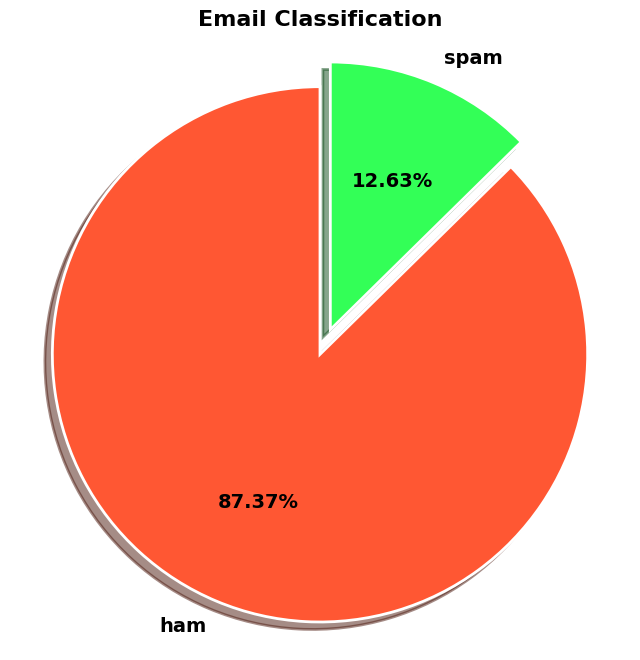

In [11]:
import matplotlib.pyplot as plt

# Calculate the counts of 'ham' and 'spam' from the dataframe
values = df['target'].value_counts()

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

# **FEATURE ENGINERRING**
Membuat kolom baru untuk teks yang sudah ditransform

In [12]:
df['transformed_text'] = df['text'].apply(transform_text)

# **MODEL TRAINING & EVALUATION**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming df is already loaded and preprocessed with 'transformed_text' and 'target' columns
X = df['transformed_text']
y = df['target']

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)


# TF-IDF feature extraction
tfidf = TfidfVectorizer(stop_words='english', min_df=2)

# Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = []
for name, clf in models.items():
    pipe = Pipeline([
        ('tfidf', tfidf),
        ('clf', clf)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# Summary table
import pandas as pd
res_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
display(res_df)


=== Naive Bayes ===
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       896
        spam       1.00      0.81      0.90       138

    accuracy                           0.97      1034
   macro avg       0.99      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034


=== Logistic Regression ===
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       896
        spam       0.98      0.73      0.84       138

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034


=== Linear SVM ===
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       896
        spam       0.97      0.86      0.91       138

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weig

,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.974855,1.000000,0.811594,0.896000
1,Logistic Regression,0.962282,0.980583,0.731884,0.838174
2,Linear SVM,0.977756,0.967480,0.862319,0.911877


In [14]:
# --- Handle Imbalanced Dataset with SMOTE ---
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np

# TF-IDF transformation
tfidf = TfidfVectorizer(stop_words='english', min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_smote))

# Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = []
for name, clf in models.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

res_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
display(res_df)


Before SMOTE: [3620  515]
After SMOTE: [3620 3620]

=== Naive Bayes ===
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       896
        spam       0.83      0.93      0.88       138

    accuracy                           0.97      1034
   macro avg       0.91      0.95      0.93      1034
weighted avg       0.97      0.97      0.97      1034


=== Logistic Regression ===
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       896
        spam       0.94      0.89      0.91       138

    accuracy                           0.98      1034
   macro avg       0.96      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034


=== Linear SVM ===
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       896
        spam       0.95      0.91      0.93       138

    accuracy                           0.98      1034
   macr

,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.965184,0.831169,0.927536,0.876712
1,Logistic Regression,0.977756,0.938931,0.891304,0.914498
2,Linear SVM,0.981625,0.954198,0.905797,0.929368


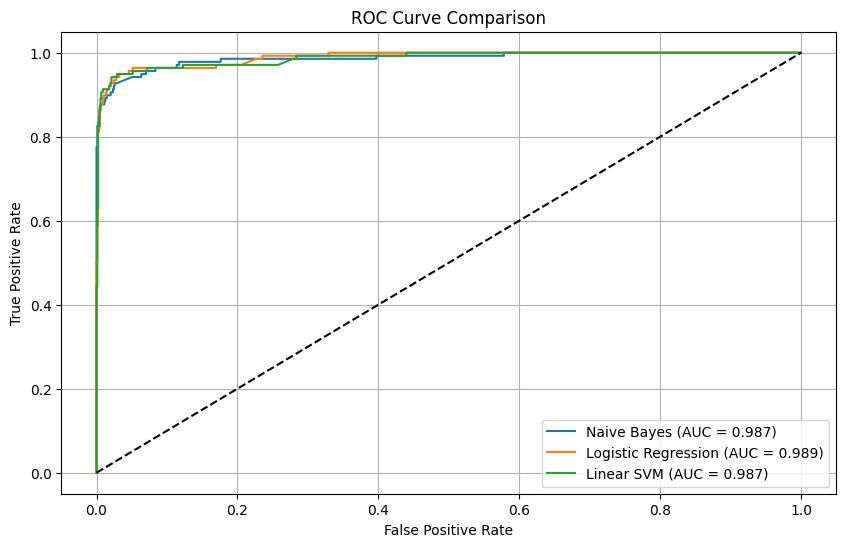

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for name, clf in models.items():
    # --- Probabilities / decision scores ---
    if hasattr(clf, "predict_proba"):
        y_scores = clf.predict_proba(X_test_tfidf)[:, 1]
    else:
        y_scores = clf.decision_function(X_test_tfidf)

    # --- ROC Curve ---
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # --- Plot ---
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Baseline diagonal
plt.plot([0, 1], [0, 1], 'k--')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


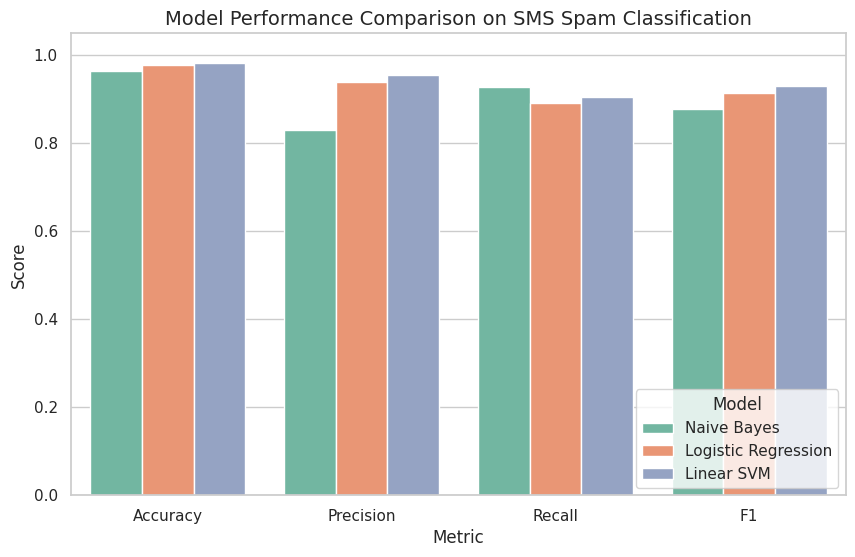

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Convert result list to DataFrame (if belum)
res_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

# --- Bar Plot for Metrics Comparison ---
plt.figure(figsize=(10,6))
res_df_melt = res_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

sns.barplot(data=res_df_melt, x="Metric", y="Score", hue="Model", palette="Set2")
plt.title("Model Performance Comparison on SMS Spam Classification", fontsize=14)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.legend(title="Model", loc="lower right")
plt.show()


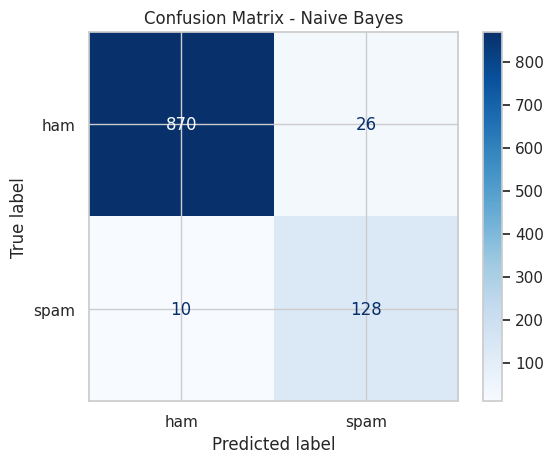

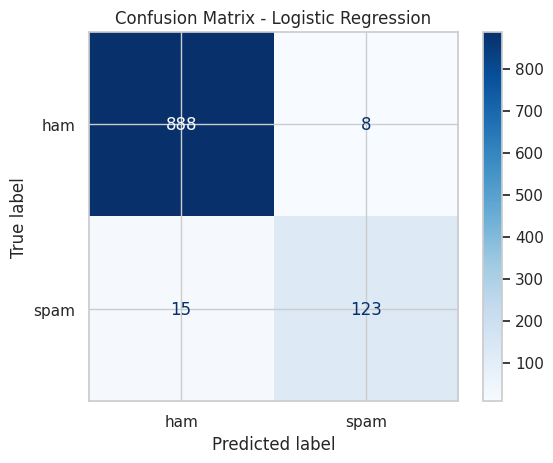

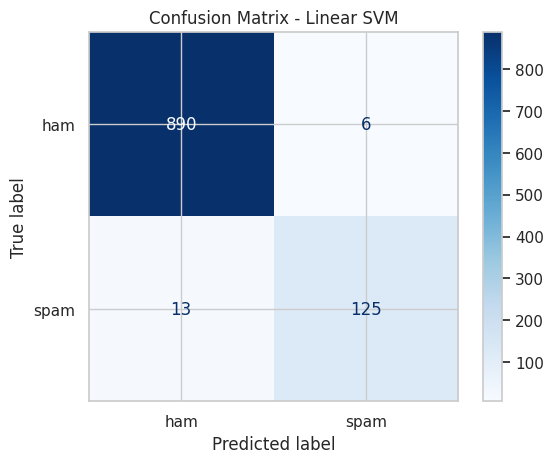

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, clf in models.items():
    y_pred = clf.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


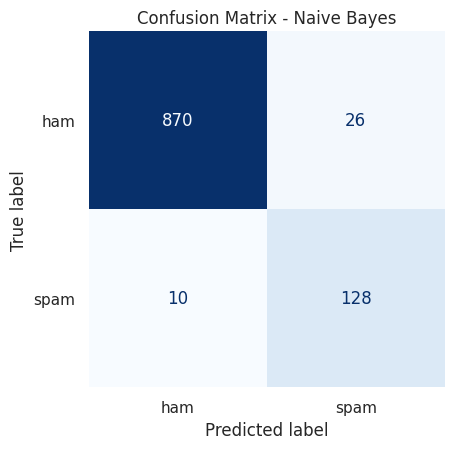

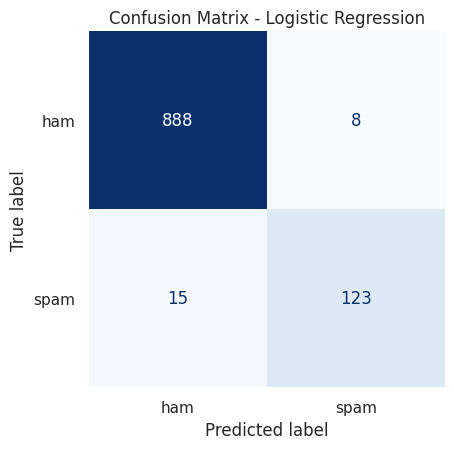

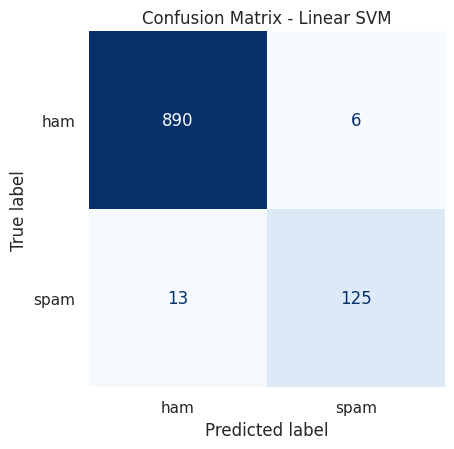

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, clf in models.items():
    y_pred = clf.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])
    disp.plot(cmap='Blues', colorbar=False)

    # --- Bersihkan tampilan ---
    plt.title(f'Confusion Matrix - {name}')
    plt.grid(False)  # hilangkan grid putih
    plt.gca().spines[:].set_visible(False)  # hilangkan garis tepi
    plt.tight_layout(pad=1.5)  # rapikan layout
    plt.show()


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import joblib

# Pipeline dengan SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('svm', SVC(kernel='linear', probability=True))
])

# Training
pipeline.fit(X_train, y_train)

# Simpan model
joblib.dump(pipeline, "model.pkl")

print("Model SVM berhasil disimpan sebagai model.pkl")


Model SVM berhasil disimpan sebagai model.pkl


In [20]:
from sklearn.model_selection import GridSearchCV

# ---------------------------------
# 1. HYPERPARAMETER TUNING
# ---------------------------------

# Multinomial Naive Bayes
nb_params = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

nb_grid = GridSearchCV(
    MultinomialNB(),
    nb_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
nb_grid.fit(X_train_smote, y_train_smote)


# Logistic Regression
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    lr_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
lr_grid.fit(X_train_smote, y_train_smote)


# Linear SVC
svm_params = {
    'C': [0.01, 0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge']
}

svm_grid = GridSearchCV(
    LinearSVC(),
    svm_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
svm_grid.fit(X_train_smote, y_train_smote)

# ---------------------------------
# 2. CETAK BEST PARAMETERS
# ---------------------------------
print("=== Best Params MultinomialNB ===")
print(nb_grid.best_params_)

print("\n=== Best Params Logistic Regression ===")
print(lr_grid.best_params_)

print("\n=== Best Params Linear SVC ===")
print(svm_grid.best_params_)

# ---------------------------------
# 3. EVALUASI DENGAN PARAMETER TERBAIK
# ---------------------------------

best_models = {
    "Naive Bayes": nb_grid.best_estimator_,
    "Logistic Regression": lr_grid.best_estimator_,
    "Linear SVM": svm_grid.best_estimator_
}

results = []

for name, clf in best_models.items():
    y_pred = clf.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

res_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
display(res_df)


=== Best Params MultinomialNB ===
{'alpha': 0.1}

=== Best Params Logistic Regression ===
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

=== Best Params Linear SVC ===
{'C': 1, 'loss': 'squared_hinge'}

=== Naive Bayes ===
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       896
        spam       0.88      0.91      0.89       138

    accuracy                           0.97      1034
   macro avg       0.93      0.95      0.94      1034
weighted avg       0.97      0.97      0.97      1034


=== Logistic Regression ===
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       896
        spam       0.95      0.89      0.92       138

    accuracy                           0.98      1034
   macro avg       0.96      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034


=== Linear SVM ===
              precision    recall  f1-score   support

         ham       

,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.970986,0.875000,0.913043,0.893617
1,Logistic Regression,0.978723,0.946154,0.891304,0.917910
2,Linear SVM,0.981625,0.954198,0.905797,0.929368


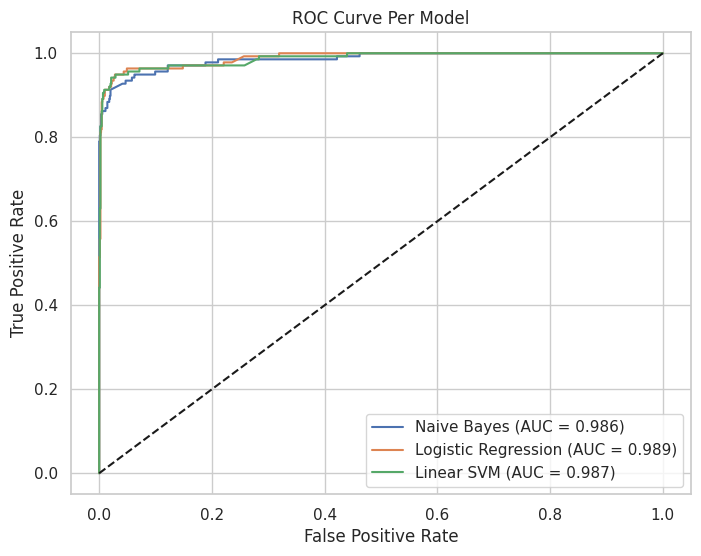

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for name, clf in best_models.items():
    # === Dapatkan skor probabilitas / decision function ===
    if hasattr(clf, "predict_proba"):
        y_scores = clf.predict_proba(X_test_tfidf)[:, 1]   # probabilitas kelas spam
    else:
        y_scores = clf.decision_function(X_test_tfidf)     # untuk LinearSVC

    # === Hitung ROC AUC ===
    auc = roc_auc_score(y_test, y_scores)
    fpr, tpr, _ = roc_curve(y_test, y_scores)

    # === Plot ROC Curve ===
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--')  # garis baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Per Model")
plt.legend()
plt.grid(True)
plt.show()
